<a href="https://colab.research.google.com/github/AnVo01/AI/blob/AI/Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense,Flatten

(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(1000,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=SGD(learning_rate = 0.005, momentum=0.9),metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=128,epochs=30,verbose=1,validation_data=(x_test,y_test))

Epoch 1/30
469/469 [==============================] - 14s 29ms/step - loss: 0.6614 - accuracy: 0.7790 - val_loss: 0.4911 - val_accuracy: 0.8353
Epoch 2/30
469/469 [==============================] - 14s 29ms/step - loss: 0.4500 - accuracy: 0.8442 - val_loss: 0.4407 - val_accuracy: 0.8437
Epoch 3/30
469/469 [==============================] - 15s 32ms/step - loss: 0.4086 - accuracy: 0.8584 - val_loss: 0.4119 - val_accuracy: 0.8552
Epoch 4/30
469/469 [==============================] - 16s 35ms/step - loss: 0.3817 - accuracy: 0.8660 - val_loss: 0.4073 - val_accuracy: 0.8574
Epoch 5/30
469/469 [==============================] - 14s 30ms/step - loss: 0.3623 - accuracy: 0.8737 - val_loss: 0.3950 - val_accuracy: 0.8593
Epoch 6/30
469/469 [==============================] - 14s 30ms/step - loss: 0.3441 - accuracy: 0.8791 - val_loss: 0.3901 - val_accuracy: 0.8591
Epoch 7/30
469/469 [==============================] - 14s 31ms/step - loss: 0.3339 - accuracy: 0.8814 - val_loss: 0.3649 - val_accuracy:

In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 1000)              785000    
                                                                 
 dense_4 (Dense)             (None, 512)               512512    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,302,642
Trainable params: 1,302,642
Non-trainable params: 0
_________________________________________________________________


In [4]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('độ chính xác kiểm tra là: ',score[1])

Sai số kiểm tra là:  0.30915582180023193
độ chính xác kiểm tra là:  0.8921999931335449


In [5]:
predictions=model.predict(x_test)
names=['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Angkle boot']

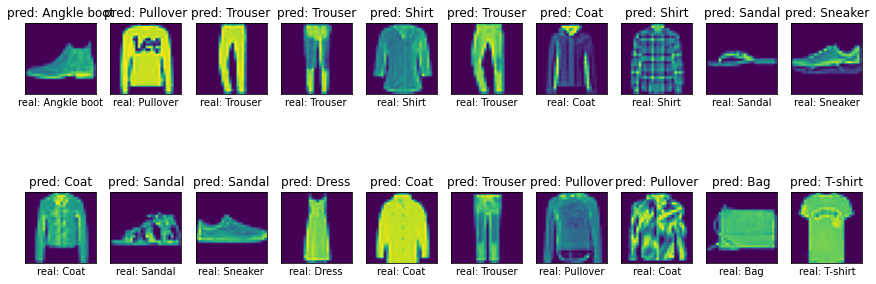

In [6]:
import numpy as np
plt.figure(figsize=(15,15))
for i in range(20):
  plt.subplot(5,10, i+1)
  plt.imshow(x_test[i])
  plt.title('pred: ' + names[np.argmax(model.predict(x_test[i].reshape((-1, 28,28))))])
  plt.xlabel('real: ' + names[np.argmax(y_test[i])])
  plt.xticks([])
  plt.yticks([])
plt.show()
#title is predicted image
#xlabel is  reality image

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
model.save('/content/gdrive/MyDrive/AI/fashion_mnist.h5')

In [10]:
from tensorflow import keras
model = keras.models.load_model('/content/gdrive/MyDrive/AI/cifar10.h5')

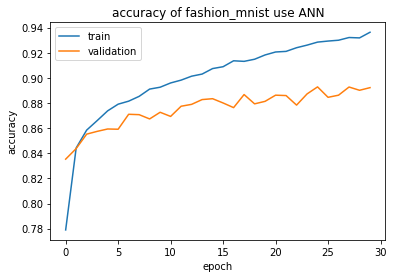

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy of fashion_mnist use ANN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()